In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LatticeData import *

# Create analyzer - instantiate class

In [2]:
analyzer = LatticeData(datadir = "/data_nls_cos/")
src_dir = "/run_7_14_23_cos/"
analyzer.collect_data(src_dir)

run L_80_beta_1.600000_itheta_0.000000_ntherm_1000_nMC_10000_freq_100 not yet complete: 46 lines
run L_80_beta_1.600000_itheta_2.356194_ntherm_1000_nMC_10000_freq_100 not yet complete: 45 lines
run L_80_beta_1.600000_itheta_0.785398_ntherm_1000_nMC_10000_freq_100 not yet complete: 45 lines
run L_80_beta_1.600000_itheta_3.141593_ntherm_1000_nMC_10000_freq_100 not yet complete: 45 lines
run L_80_beta_1.600000_itheta_1.570796_ntherm_1000_nMC_10000_freq_100 not yet complete: 45 lines


## Basic statistics

In [3]:
df = analyzer.get_data()

In [4]:
df.head()

,step,|phi|,Q_L,A_L,S_L,Xi_L,F_LRe,F_LIm,acc,dt,...,Q_L_ta,A_L_ta,S_L_ta,Xi_L_ta,corr_length_Re,corr_length_Im,F_Re_py,F_Im_py,mass_gap_Re,mass_gap_Im
0,0,400.0,0.000000,-2137.292390,-2137.292390,-2.414255,31.17255,-57.054028,0.070000,0.0,...,1,4,4,6,1.437852,-2.874117,1.431987,-1.911072,0.139219,0.278285
1,100,400.0,-0.000015,-2125.605769,-2125.605757,122.666830,31.17255,-57.054028,0.083688,1.0,...,1,4,4,6,20.486910,10.249108,1.431987,-1.911072,0.039041,-0.019531
2,200,400.0,-0.000000,-2137.071110,-2137.071110,235.966732,31.17255,-57.054028,0.084440,2.0,...,1,4,4,6,28.414387,14.215034,1.431987,-1.911072,0.028149,-0.014082
3,300,400.0,-0.000001,-2172.206101,-2172.206100,105.763229,31.17255,-57.054028,0.083463,4.0,...,1,4,4,6,19.023054,9.516776,1.431987,-1.911072,0.042045,-0.021034
4,400,400.0,0.000000,-2131.261096,-2131.261096,147.305521,31.17255,-57.054028,0.083242,5.0,...,1,4,4,6,22.450313,11.231351,1.431987,-1.911072,0.035626,-0.017823


In [5]:
df["itheta"].unique()

array([0.785398, 1.570796, 3.141593, 2.356194, 0.      ])

In [6]:
df_stats = analyzer.do_stats(therm = 0)

In [7]:
df_stats.head()

|phi|_mean      Q_L_mean    A_L_mean  \
length itheta   beta nMC     ntherm                                         
10.0   0.000000 1.6  10000.0 1000.0       100.0 -6.000000e-07 -537.575236   
       0.785398 1.6  10000.0 1000.0       100.0 -3.400000e-07 -537.373225   
       1.570796 1.6  10000.0 1000.0       100.0 -1.800000e-07 -535.745035   
       2.356194 1.6  10000.0 1000.0       100.0 -5.200000e-07 -534.903504   
       3.141593 1.6  10000.0 1000.0       100.0 -1.500000e-07 -538.485988   

                                       S_L_mean  Xi_L_mean  F_LRe_mean  \
length itheta   beta nMC     ntherm                                      
10.0   0.000000 1.6  10000.0 1000.0 -537.575236  67.389943    1.692555   
       0.785398 1.6  10000.0 1000.0 -537.373225  68.328849    7.178208   
       1.570796 1.6  10000.0 1000.0 -535.745035  69.829515    1.190562   
       2.356194 1.6  10000.0 1000.0 -534.903502  71.460919    0.911349   
       3.141593 1.6  10000.0 1000.0 -538.485988  71.206487   -1.075759   

                                     F_LIm_mean  acc_mean  freq_mean  Q_L_ta  \
length itheta   beta nMC     ntherm                                            
10.0   0.000000 1.6  10000.0 1000.0   -3.112338  0.085682      100.0     1.0   
       0.785398 1.6  10000.0 1000.0    1.383756  0.085631      100.0     1.0   
       1.570796 1.6  10000.0 1000.0    0.817908  0.086070      100.0     1.0   
       2.356194 1.6  10000.0 1000.0   -1.242737  0.085579      100.0     1.0   
       3.141593 1.6  10000.0 1000.0   -3.131418  0.086085      100.0     1.0   

                                     ...  freq_std  corr_length_Re_std  \
length itheta   beta nMC     ntherm  ...                                 
10.0   0.000000 1.6  10000.0 1000.0  ...       0.0            2.959806   
       0.785398 1.6  10000.0 1000.0  ...       0.0            2.213256   
       1.570796 1.6  10000.0 1000.0  ...       0.0            2.308184   
       2.356194 1.6  10000.0 1000.0  ...       0.0            1.894507   
       3.141593 1.6  10000.0 1000.0  ...       0.0            1.684245   

                                     corr_length_Im_std  F_Re_py_std  \
length itheta   beta nMC     ntherm                                    
10.0   0.000000 1.6  10000.0 1000.0            1.999546          0.0   
       0.785398 1.6  10000.0 1000.0            0.519524          0.0   
       1.570796 1.6  10000.0 1000.0            0.189573          0.0   
       2.356194 1.6  10000.0 1000.0            0.166728          0.0   
       3.141593 1.6  10000.0 1000.0            1.541641          0.0   

                                     F_Im_py_std  mass_gap_Re_std  \
length itheta   beta nMC     ntherm                                 
10.0   0.000000 1.6  10000.0 1000.0          0.0         0.009025   
       0.785398 1.6  10000.0 1000.0          0.0         0.011530   
       1.570796 1.6  10000.0 1000.0          0.0         0.005179   
       2.356194 1.6  10000.0 1000.0          0.0         0.005930   
       3.141593 1.6  10000.0 1000.0          0.0         0.003755   

                                     mass_gap_Im_std  time (sec)  time (min)  \
length itheta   beta nMC     ntherm                                            
10.0   0.000000 1.6  10000.0 1000.0         0.007999        28.0    0.466667   
       0.785398 1.6  10000.0 1000.0         0.022069        25.0    0.416667   
       1.570796 1.6  10000.0 1000.0         0.000425        29.0    0.483333   
       2.356194 1.6  10000.0 1000.0         0.000522        20.0    0.333333   
       3.141593 1.6  10000.0 1000.0         0.003437        21.0    0.350000   

                                     time (hr)  
length itheta   beta nMC     ntherm             
10.0   0.000000 1.6  10000.0 1000.0   0.007778  
       0.785398 1.6  10000.0 1000.0   0.006944  
       1.570796 1.6  10000.0 1000.0   0.008056  
       2.356194 1.6  10000.0 1000.0   0.005556  
       3.141593 1.6  10000.0 1000.0   0.005833  

[5 r

# Observable quick plots (seaborn)

In [8]:
beta = 1.6
nMC = 10000
plot_params = {"beta": beta, "nMC": nMC}

In [9]:
df_stats = analyzer.do_stats(therm = 0.4, **plot_params)

In [10]:
df_stats.columns

Index(['|phi|_mean', 'Q_L_mean', 'A_L_mean', 'S_L_mean', 'Xi_L_mean',
       'F_LRe_mean', 'F_LIm_mean', 'acc_mean', 'freq_mean', 'Q_L_ta', 'A_L_ta',
       'S_L_ta', 'Xi_L_ta', 'corr_length_Re_mean', 'corr_length_Im_mean',
       'F_Re_py_mean', 'F_Im_py_mean', 'mass_gap_Re_mean', 'mass_gap_Im_mean',
       '|phi|_std', 'Q_L_std', 'A_L_std', 'S_L_std', 'Xi_L_std', 'F_LRe_std',
       'F_LIm_std', 'acc_std', 'freq_std', 'corr_length_Re_std',
       'corr_length_Im_std', 'F_Re_py_std', 'F_Im_py_std', 'mass_gap_Re_std',
       'mass_gap_Im_std', 'time (sec)', 'time (min)', 'time (hr)'],
      dtype='object')

### Q_L

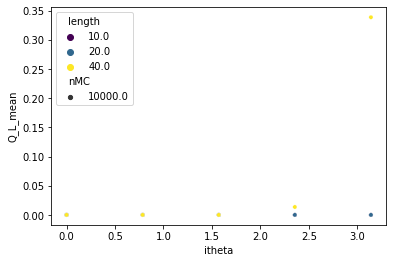

In [11]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Q_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### S_L

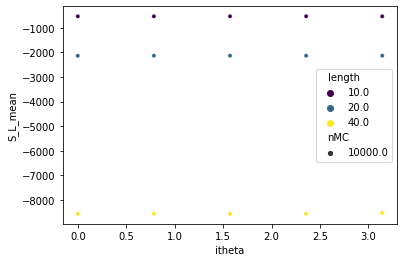

In [12]:
sns.scatterplot(data = df_stats, x = "itheta", y = "S_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### Xi_L

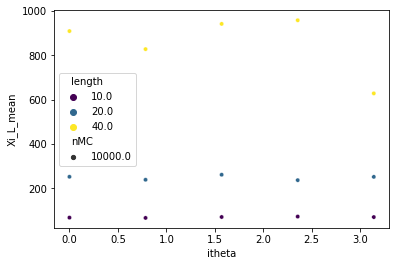

In [13]:
sns.scatterplot(data = df_stats, x = "itheta", y = "Xi_L_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)
plt.show()

### F_L Re

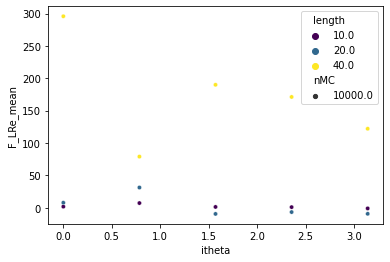

In [14]:
sns.scatterplot(data = df_stats, x = "itheta", y = "F_LRe_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

In [15]:
F_L_Re_df = df_stats.filter(["F_LRe_mean","F_Re_py_mean"])
F_L_Re_df.rename(columns = {"F_LRe_mean":"C++","F_Re_py_mean":"Python"},inplace = True)
F_L_Re_df.columns.name = 'Source'
F_L_Im_df = df_stats.filter(["F_LIm_mean","F_Im_py_mean"])
F_L_Im_df.rename(columns = {"F_LIm_mean":"C++","F_Im_py_mean":"Python"},inplace = True)
F_L_Im_df.columns.name = 'Source'
F_L_Re_df = F_L_Re_df.stack()
F_L_Im_df = F_L_Im_df.stack()
F_L_Re_df.name = "F_L"
F_L_Re_df = F_L_Re_df.to_frame()
F_L_Im_df.name = "F_L"
F_L_Im_df = F_L_Im_df.to_frame()
F_L_Im_df.head()

F_L
length itheta   beta nMC     ntherm Source          
10.0   0.000000 1.6  10000.0 1000.0 C++    -3.112338
                                    Python -0.189068
       0.785398 1.6  10000.0 1000.0 C++     1.383756
                                    Python -0.058860
       1.570796 1.6  10000.0 1000.0 C++     0.817908

In [16]:
F_L_df = F_L_Re_df.join(F_L_Im_df, lsuffix = "_Re", rsuffix = "_Im")

In [17]:
F_L_df.head()

F_L_Re    F_L_Im
length itheta   beta nMC     ntherm Source                    
10.0   0.000000 1.6  10000.0 1000.0 C++     1.692555 -3.112338
                                    Python  0.373933 -0.189068
       0.785398 1.6  10000.0 1000.0 C++     7.178208  1.383756
                                    Python  0.770374 -0.058860
       1.570796 1.6  10000.0 1000.0 C++     1.190562  0.817908

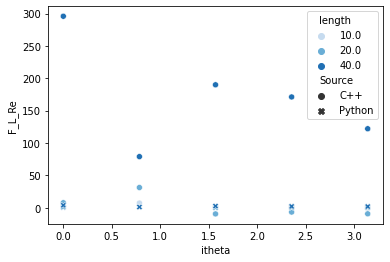

In [19]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Re", hue = "length", 
                style = "Source", palette = sns.color_palette("Blues", 3))
plt.show()

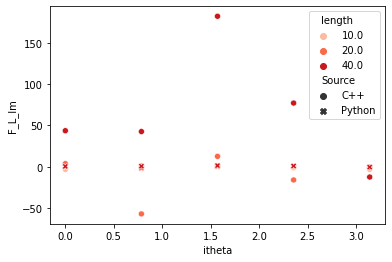

In [20]:
sns.scatterplot(data = F_L_df, x = "itheta", y = "F_L_Im", hue = "length", 
                style = "Source", palette = sns.color_palette("Reds", 3))
plt.show()

## Correlation Length

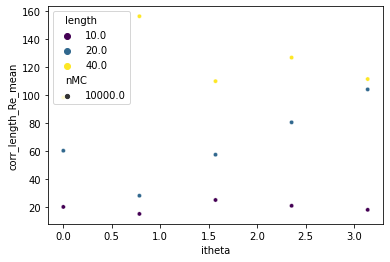

In [21]:
sns.scatterplot(data = df_stats, x = "itheta", y = "corr_length_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

### Mass Gap

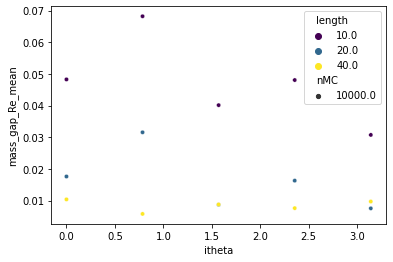

In [22]:
sns.scatterplot(data = df_stats, x = "itheta", y = "mass_gap_Re_mean", hue = "length", 
                size = "nMC", palette = analyzer.palette)

plt.show()

# Observable detailed plots with error (matplotlib)

In [28]:
lengths = [10,20,40]
colors = sns.color_palette("Blues", len(lengths))
observable = "Q_L"

In [2]:
for n,length in enumerate(lengths):
    x,y,err = analyzer.get_plot_data(obs = observable, L = length, beta = 1.6, nMC = 10000, ntherm = 1000)
    plt.errorbar(x, y , yerr = err, marker = ".", ls = "none", color = colors[n], label ="L="+str(length))
plt.legend()
plt.title(observable)
plt.show()

NameError: name 'lengths' is not defined